In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
app_df = pd.read_csv('Resources/googleplaystore.csv')
app_df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [3]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
categorical = [var for var in app_df.columns if app_df[var].dtype=='O']
print(categorical)

['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [5]:
#print for values
rating = app_df["Rating"].unique()
reviews = app_df["Reviews"].unique()
size = app_df["Size"].unique()
installs = app_df["Installs"].unique()
type_ = app_df["Type"].unique()
price = app_df["Price"].unique()
content_rating = app_df["Content Rating"].unique()

In [6]:
#null check
app_df.isnull().any()
app_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#clean check
app_df_clean = app_df.dropna(how='any')
app_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


<h4>App Categories

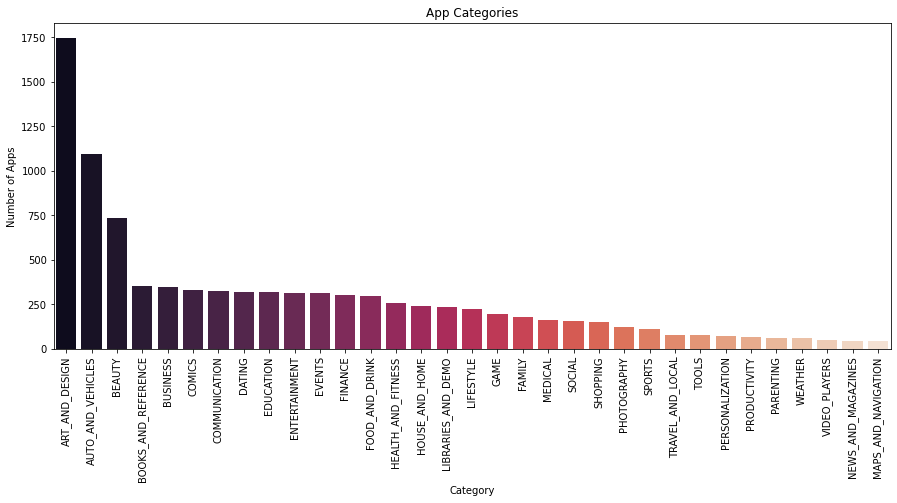

In [8]:
#cat var
cat =app_df_clean["Category"].unique()
cat_count= app_df_clean["Category"].value_counts()
cat_count_list = cat_count.tolist() #y
#cat_list = cat.tolist()

x = cat
y = cat_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

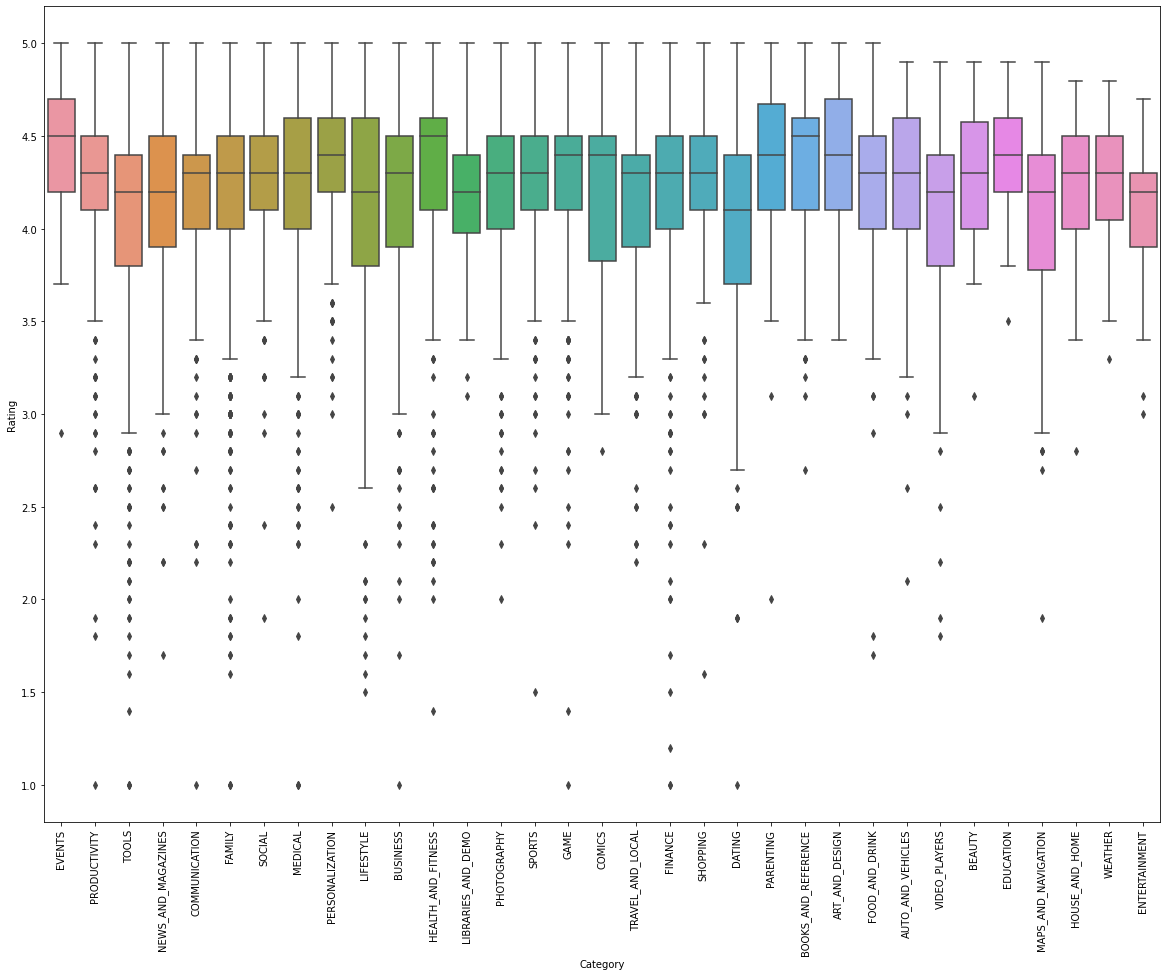

                      App
Category                 
ART_AND_DESIGN         61
AUTO_AND_VEHICLES      73
BEAUTY                 42
BOOKS_AND_REFERENCE   178
BUSINESS              303
COMICS                 58
COMMUNICATION         328
DATING                195
EDUCATION             155
ENTERTAINMENT         149
EVENTS                 45
FAMILY               1746
FINANCE               323
FOOD_AND_DRINK        109
GAME                 1097
HEALTH_AND_FITNESS    297
HOUSE_AND_HOME         76
LIBRARIES_AND_DEMO     64
LIFESTYLE             314
MAPS_AND_NAVIGATION   124
MEDICAL               350
NEWS_AND_MAGAZINES    233
PARENTING              50
PERSONALIZATION       312
PHOTOGRAPHY           317
PRODUCTIVITY          351
SHOPPING              238
SOCIAL                259
SPORTS                319
TOOLS                 733
TRAVEL_AND_LOCAL      226
VIDEO_PLAYERS         160
WEATHER                75


In [9]:
count_cat = app_df_clean.groupby(['Category']).count()
cat_df = pd.DataFrame(count_cat.App)
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()
print(cat_df)

<h4>App Genres

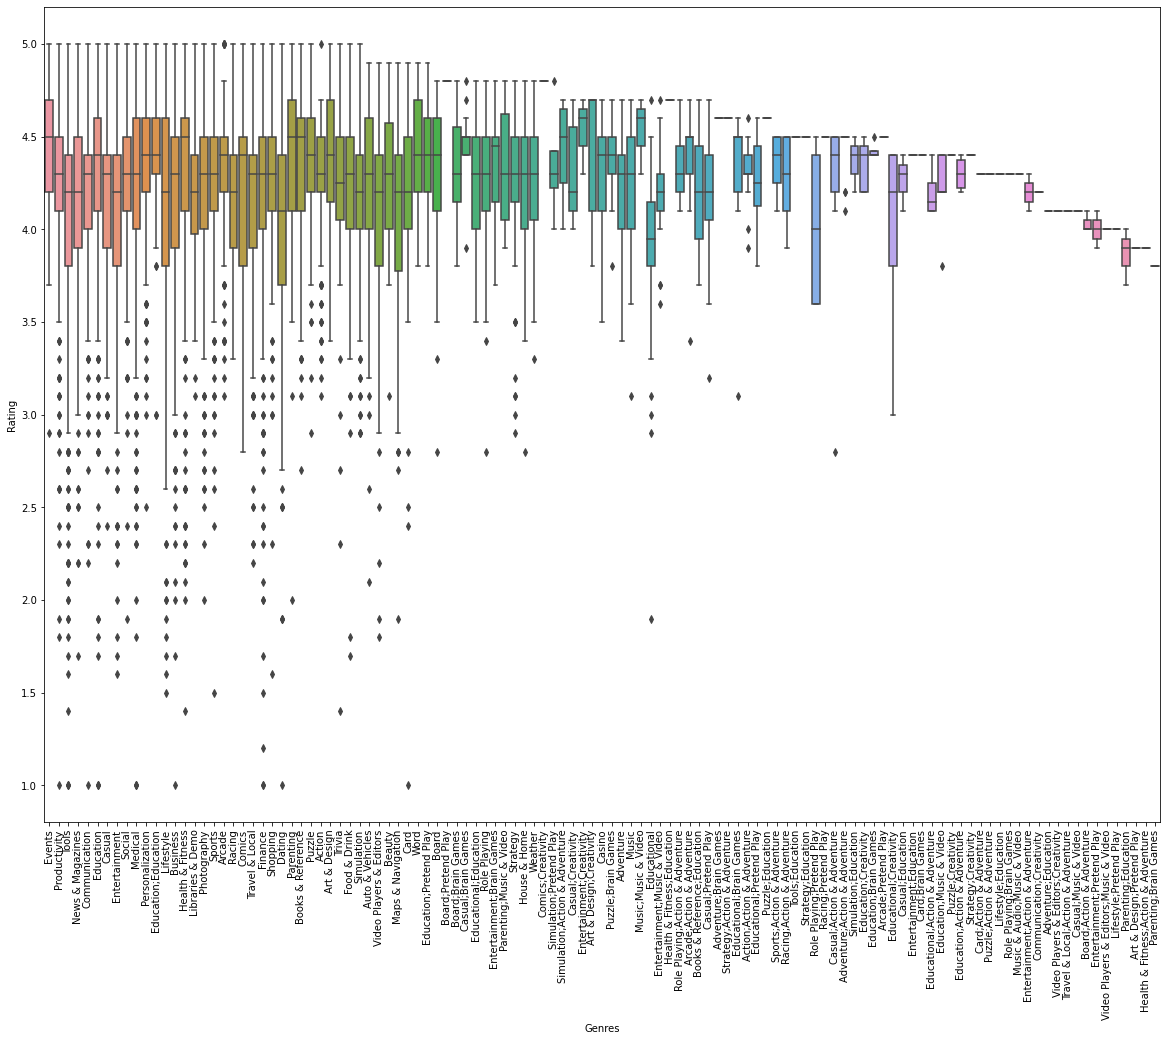

In [10]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
count_gen = app_df_clean.groupby(['Genres']).count()
gen_df = pd.DataFrame(count_gen.App)

plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Genres',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()

<h4>App Ratings

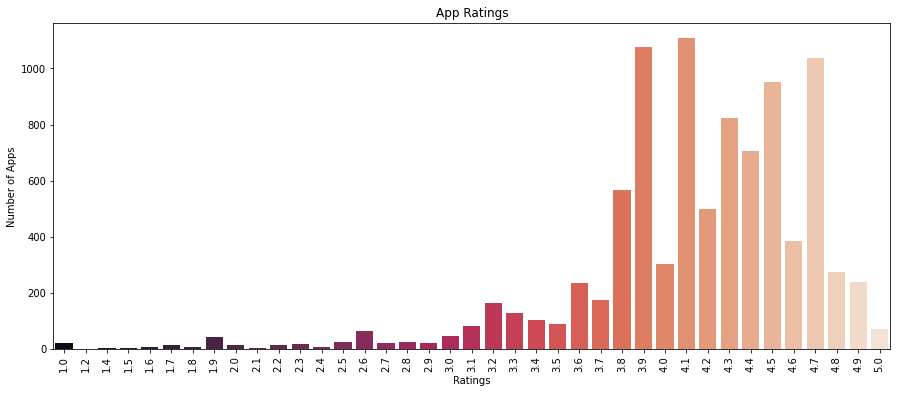

In [11]:
rating = app_df_clean["Rating"].unique()
rating_count= app_df_clean["Rating"].value_counts()
rating_count_list = rating_count.tolist() #y

x = rating
y = rating_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Apps")
plt.show()

In [12]:
#print(rating_count.sort_index())

<h5>missing values for 1.1, 1.3, 
<h5>less than 30 samples for all ratings < 2.8

Rating Histogram, Distribution

Text(0.5, 1.0, 'Rating Distribution')

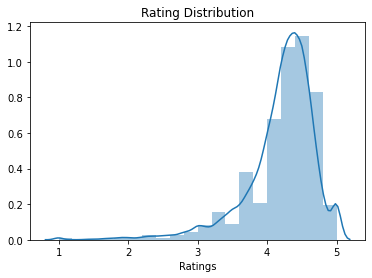

In [13]:
fig = sns.distplot(app_df_clean["Rating"], bins=20)   

fig.set_xlabel('Ratings')
plt.title('Rating Distribution')

Ratings binned 20 

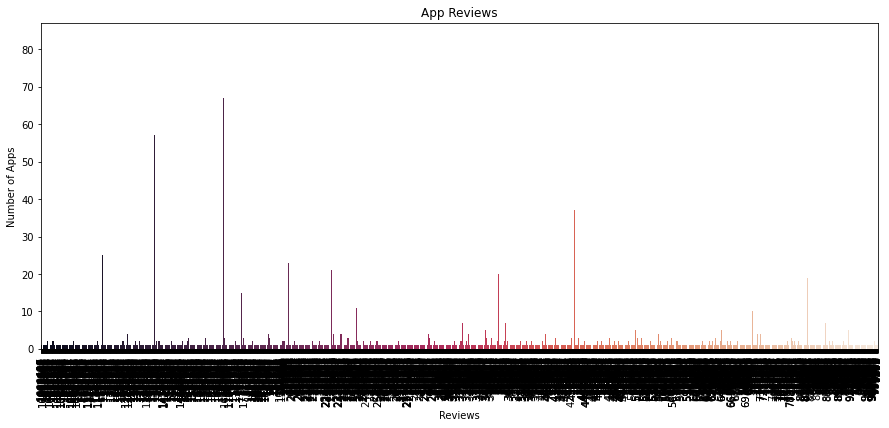

In [14]:
reviews =app_df_clean["Reviews"].unique()
review_count= app_df_clean["Reviews"].value_counts()
review_count_list = review_count.tolist() #y

x = reviews
y = review_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Reviews")
plt.xlabel("Reviews")
plt.ylabel("Number of Apps")
plt.show()

In [15]:
app_df_clean = app_df_clean.astype({'Reviews':int})

Text(0.5, 1.0, 'Reviews Distribution')

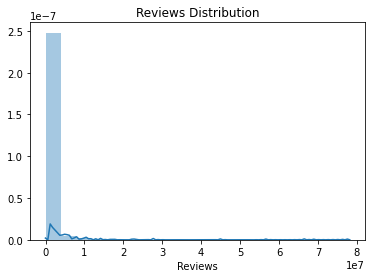

In [16]:
fig = sns.distplot(app_df_clean["Reviews"], bins=20)   

fig.set_xlabel('Reviews')
plt.title('Reviews Distribution')

In [17]:
min_value = app_df_clean["Reviews"].min()
max_value = app_df_clean["Reviews"].max()
median_value = app_df_clean["Reviews"].median()
mean_value = app_df_clean["Reviews"].mean()
print(median_value)
print(mean_value)
rating_bins = np.linspace(min_value,max_value, 100)
rating_bins.astype(int)

5955.0
514376.7052350427


array([       1,   789478,  1578956,  2368434,  3157912,  3947390,
        4736867,  5526345,  6315823,  7105301,  7894779,  8684257,
        9473734, 10263212, 11052690, 11842168, 12631646, 13421124,
       14210601, 15000079, 15789557, 16579035, 17368513, 18157991,
       18947468, 19736946, 20526424, 21315902, 22105380, 22894858,
       23684335, 24473813, 25263291, 26052769, 26842247, 27631724,
       28421202, 29210680, 30000158, 30789636, 31579114, 32368591,
       33158069, 33947547, 34737025, 35526503, 36315981, 37105458,
       37894936, 38684414, 39473892, 40263370, 41052848, 41842325,
       42631803, 43421281, 44210759, 45000237, 45789715, 46579192,
       47368670, 48158148, 48947626, 49737104, 50526582, 51316059,
       52105537, 52895015, 53684493, 54473971, 55263448, 56052926,
       56842404, 57631882, 58421360, 59210838, 60000315, 60789793,
       61579271, 62368749, 63158227, 63947705, 64737182, 65526660,
       66316138, 67105616, 67895094, 68684572, 69474049, 70263

<h4>App Installs

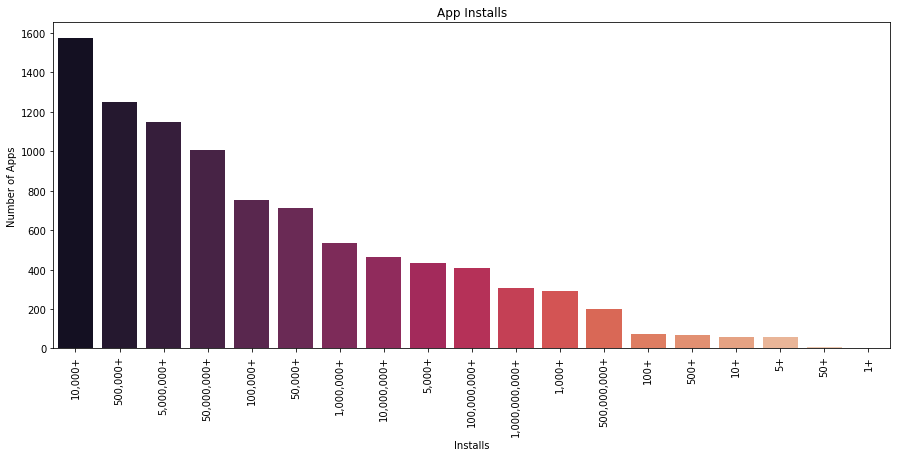

In [18]:
installs =app_df_clean["Installs"].unique()
installs_count= app_df_clean["Installs"].value_counts()
installs_count_list = installs_count.tolist() #y


x = installs
y = installs_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Installs")
plt.xlabel("Installs")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Types

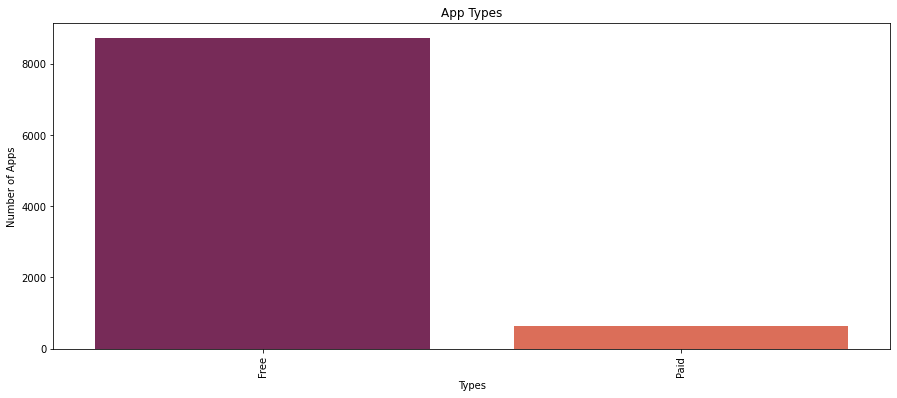

In [19]:
#cat var
type_ =app_df_clean["Type"].unique()
type_count= app_df_clean["Type"].value_counts()
type_count_list = type_count.tolist() #y
#cat_list = cat.tolist()

x = type_
y = type_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Types")
plt.xlabel("Types")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Price

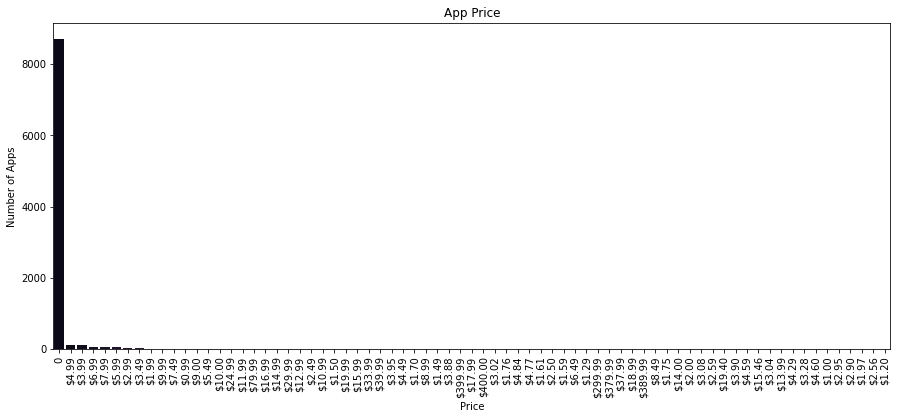

In [20]:
#cat var
price =app_df_clean["Price"].unique()
price_count= app_df_clean["Price"].value_counts()
price_count_list = price_count.tolist() #y
#cat_list = cat.tolist()

x = price
y = price_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Price")
plt.xlabel("Price")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Content Ratings

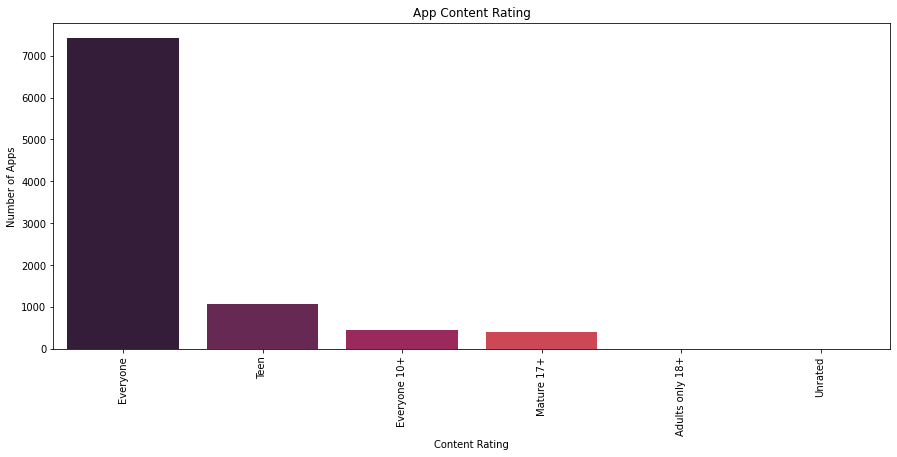

In [21]:
cr =app_df_clean["Content Rating"].unique()
cr_count= app_df_clean["Content Rating"].value_counts()
cr_count_list = cr_count.tolist() #y

x = cr
y = cr_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

In [22]:
app_df_clean.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [23]:
app_df_new  = app_df_clean[['App', 'Category','Rating','Reviews','Size','Installs','Type','Content Rating']]
app_df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Content Rating  
0      159   19M      10,000+  Free       Everyone  
1      967   14M     500,000+  Free       Everyone  
2    87510  8.7M   5,000,000+  Free       Everyone  
3   215644   25M  50,000,000+  Free           Teen  
4      967  2.8M     100,000+  Free       Everyone

<b>Re-setting Columns 

In [24]:
reviews = app_df_new["Reviews"].unique()
print(reviews)

[   159    967  87510 ...    603   1195 398307]


In [25]:
app_df_new = app_df_new.astype({'Reviews':int})

In [26]:
size = app_df_new["Size"].unique()

In [27]:
app_df_new = app_df_new[app_df_new.Size != 'Varies with device']
app_df_new['Size'] =app_df_new['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
#alt mb option 
#app_df_new['Size'] =app_df_new['Size'].replace({'k': '*.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)

In [28]:
installs = app_df["Installs"].unique()
print(installs)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [29]:
app_df_new['Installs'] = app_df_new['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
#app_df_new['Installs'] = app_df_new.Installs.astype(int)

In [30]:
type_ = app_df_new["Type"].unique()
print(type_)

content_rating = app_df_new["Content Rating"].unique()
print(content_rating)

['Free' 'Paid']
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [31]:
#app_df_new = app_df_new[app_df_new.Price != 'Everyone'] 
#app_df_new['Price'] = app_df_new['Price'].apply(lambda x : x.strip('$'))
#app_df_new['Price'] = app_df_new.Price.astype(float)

<h4>One-hot encoding Category, Type, Content Rating DataFrame

In [32]:
categorical = [var for var in app_df_new.columns if app_df_new[var].dtype=='O']
print(categorical)

['App', 'Category', 'Installs', 'Type', 'Content Rating']


In [33]:
#re-order columns for target
app_df_new = app_df_new[['App','Rating','Category','Reviews','Size','Installs','Type','Content Rating']]
app_df_new['Installs'] = app_df_new.Installs.astype(int)
app_df_reset = app_df_new.reset_index().drop('index', axis=1)
app_df_reset.head()

App  Rating        Category  \
0     Photo Editor & Candy Camera & Grid & ScrapBook     4.1  ART_AND_DESIGN   
1                                Coloring book moana     3.9  ART_AND_DESIGN   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  ART_AND_DESIGN   
3                              Sketch - Draw & Paint     4.5  ART_AND_DESIGN   
4              Pixel Draw - Number Art Coloring Book     4.3  ART_AND_DESIGN   

   Reviews      Size  Installs  Type Content Rating  
0      159  19000000     10000  Free       Everyone  
1      967  14000000    500000  Free       Everyone  
2    87510   8700000   5000000  Free       Everyone  
3   215644  25000000  50000000  Free           Teen  
4      967   2800000    100000  Free       Everyone

In [34]:
app_df_reset.to_csv('Resources/Features_Labeled_Categories')

<h4>Scatter Size, Rating

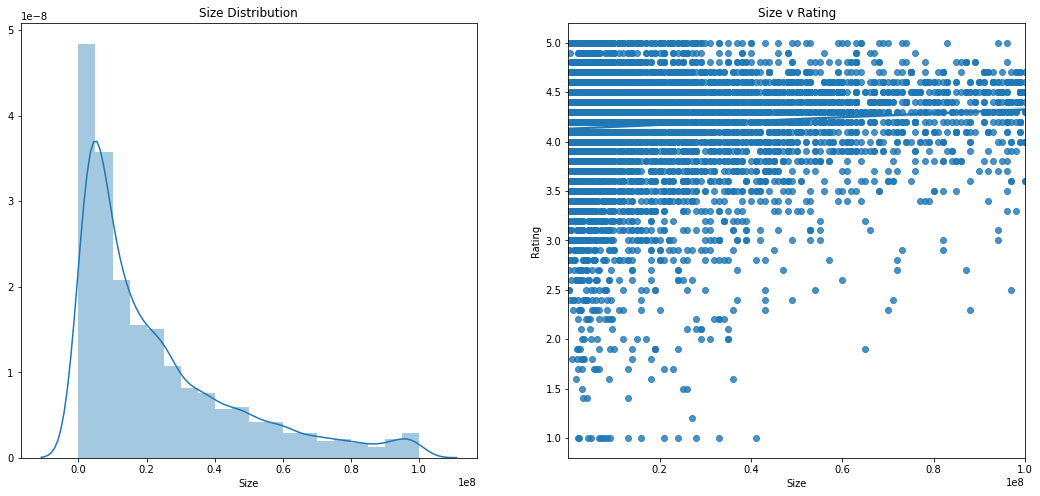

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = sns.distplot(app_df_new["Size"], bins=20, ax=ax[0]) 
ax[0].set_title('Size Distribution')
ax[0].set_xlabel('Size')
#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.regplot(data=app_df_new,x='Size',y='Rating')
ax[1].set_title("Size v Rating")
plt.show()

<AxesSubplot:xlabel='Size', ylabel='Rating'>

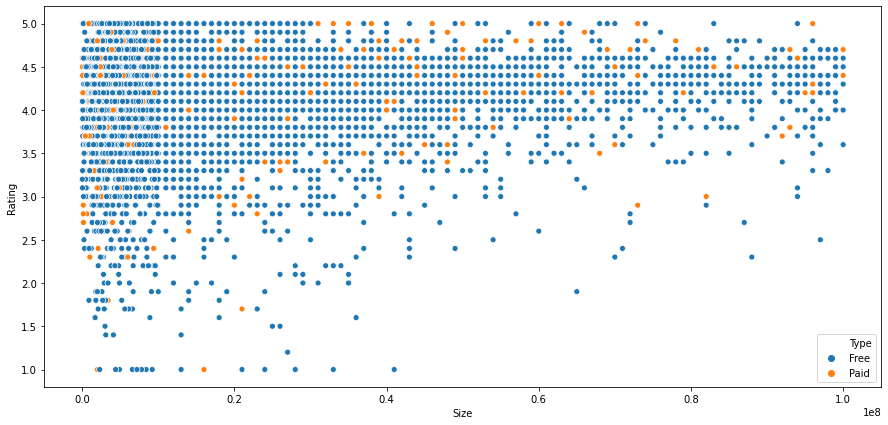

In [36]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_reset,x='Size',y='Rating',hue='Type')

<h4>Scatter Reviews, Rating 

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

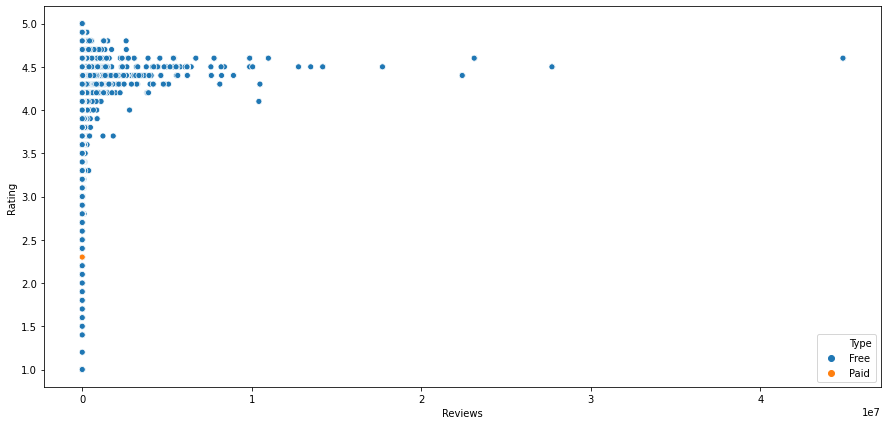

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_reset,x='Reviews',y='Rating',hue='Type')

<h4>Scatter Installs, Rating

<AxesSubplot:xlabel='Installs', ylabel='Rating'>

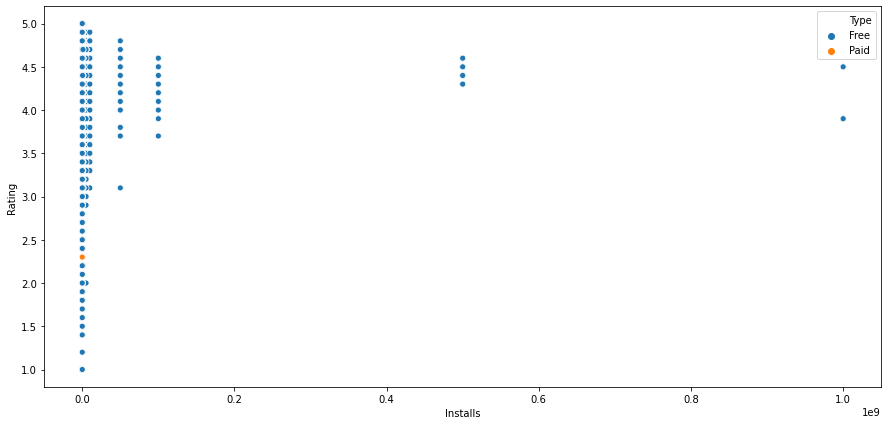

In [38]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_reset,x='Installs',y='Rating',hue='Type')

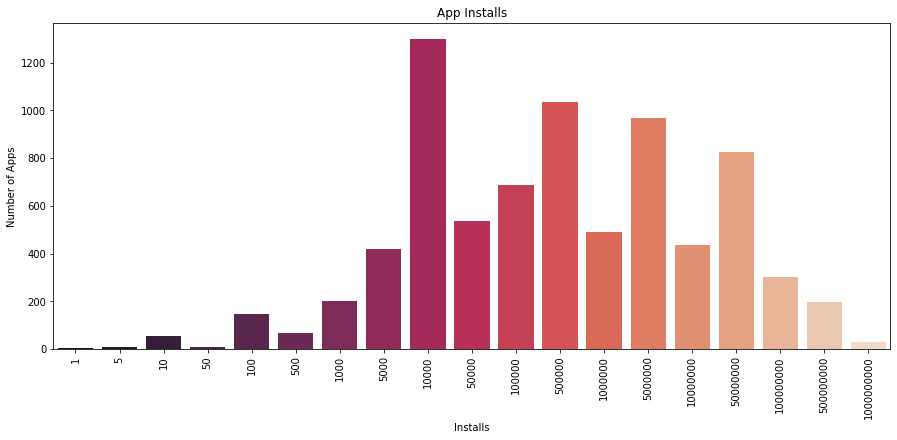

In [39]:
installs =app_df_reset["Installs"].unique()
installs_count= app_df_reset["Installs"].value_counts()
installs_count_list = installs_count.tolist() #y


x = installs
y = installs_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Installs")
plt.xlabel("Installs")
plt.ylabel("Number of Apps")
plt.show()

<h4>Labeling Review Tier Clusters

In [40]:
review_conditions = [
(app_df_reset.Reviews <= 2045554) & (app_df_reset.Reviews >= 1),
(app_df_reset.Reviews <= 6800000) & (app_df_reset.Reviews >= 2119218),
(app_df_reset.Reviews <= 14300000) & (app_df_reset.Reviews >= 7500000),
(app_df_reset.Reviews <= 45000000) & (app_df_reset.Reviews >= 17000000),
]
review_values = ["1-2.5M","3M-6.5M","7.5M-14M","17M-45M"]
app_df_reset['Review Group'] = np.select(review_conditions, review_values)

<h4>Labeling Size Tier Clusters

In [41]:
size_conditions = [
(app_df_reset.Size <= 12000000) & (app_df_reset.Size >= 8500),
(app_df_reset.Size <= 28000000) & (app_df_reset.Size >= 13000000),
(app_df_reset.Size <= 48000000) & (app_df_reset.Size >= 28000000),
(app_df_reset.Size <= 73000000) & (app_df_reset.Size >= 49000000),
(app_df_reset.Size >= 74000000),
]
size_values = ["8.5K-12M","13M-28M","29M-48M","49M-73M","74M+"]
app_df_reset['Size Group'] = np.select(size_conditions, size_values)

In [42]:
app_df_reset.to_csv('Resources/Features_review_size_tiers')

<h4>One-Hot Encoding Categorical Features (Category, Installs, Type, Content Rating)

In [43]:
# Select the numeric columns
numeric_subset = app_df_new.select_dtypes('number')
categorical_subset = app_df_new.select_dtypes('object').drop('App', axis=1)

# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns])
#numeric_subset = numeric_subset.drop("Rating", axis=1)

#axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

<h4>Merging DataFrame with App Name

In [44]:
app_merge = app_df_new['App']
app_merge = pd.DataFrame(app_merge) #new dataframe with app name to merge with features dataframe 

In [45]:
#contains app name
features.join(app_merge, how='outer')
features_merged = features.merge(app_merge, how='outer', left_index=True, right_index=True)
features_merged.head()

Rating  Reviews      Size  Installs  Category_ART_AND_DESIGN  \
0     4.1      159  19000000     10000                        1   
1     3.9      967  14000000    500000                        1   
2     4.7    87510   8700000   5000000                        1   
3     4.5   215644  25000000  50000000                        1   
4     4.3      967   2800000    100000                        1   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                           0                0                             0   
1                           0                0                             0   
2                           0                0                             0   
3                           0                0                             0   
4                           0                0                             0   

   Category_BUSINESS  Category_COMICS  ...  Category_WEATHER  Type_Free  \
0                  0                0  ...                 0          1   
1                  0                0  ...                 0          1   
2                  0                0  ...                 0          1   
3                  0                0  ...                 0          1   
4                  0                0  ...                 0          1   

   Type_Paid  Content Rating_Adults only 18+  Content Rating_Everyone  \
0          0                               0                        1   
1          0                               0                        1   
2          0                               0                        1   
3          0                               0                        0   
4          0                               0                        1   

   Content Rating_Everyone 10+  Content Rating_Mature 17+  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Content Rating_Teen  Content Rating_Unrated  \
0                    0                       0   
1                    0                       0   
2                    0                       0   
3                    1                       0   
4                    0                       0   

                                                 App  
0     Photo Editor & Candy Camera & Grid & ScrapBook  
1                                Coloring book moana  
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  
3                              Sketch - Draw & Paint  
4              Pixel Draw - Number Art Coloring Book  

[5 rows x 46 columns]

In [46]:
features_reset =features_merged.reset_index().drop('index', axis=1)
features_reset.head() 

Rating  Reviews      Size  Installs  Category_ART_AND_DESIGN  \
0     4.1      159  19000000     10000                        1   
1     3.9      967  14000000    500000                        1   
2     4.7    87510   8700000   5000000                        1   
3     4.5   215644  25000000  50000000                        1   
4     4.3      967   2800000    100000                        1   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                           0                0                             0   
1                           0                0                             0   
2                           0                0                             0   
3                           0                0                             0   
4                           0                0                             0   

   Category_BUSINESS  Category_COMICS  ...  Category_WEATHER  Type_Free  \
0                  0                0  ...                 0          1   
1                  0                0  ...                 0          1   
2                  0                0  ...                 0          1   
3                  0                0  ...                 0          1   
4                  0                0  ...                 0          1   

   Type_Paid  Content Rating_Adults only 18+  Content Rating_Everyone  \
0          0                               0                        1   
1          0                               0                        1   
2          0                               0                        1   
3          0                               0                        0   
4          0                               0                        1   

   Content Rating_Everyone 10+  Content Rating_Mature 17+  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Content Rating_Teen  Content Rating_Unrated  \
0                    0                       0   
1                    0                       0   
2                    0                       0   
3                    1                       0   
4                    0                       0   

                                                 App  
0     Photo Editor & Candy Camera & Grid & ScrapBook  
1                                Coloring book moana  
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  
3                              Sketch - Draw & Paint  
4              Pixel Draw - Number Art Coloring Book  

[5 rows x 46 columns]

<h4>App Correlation to Rating with Category (33), Type (2), Content Rating(6)

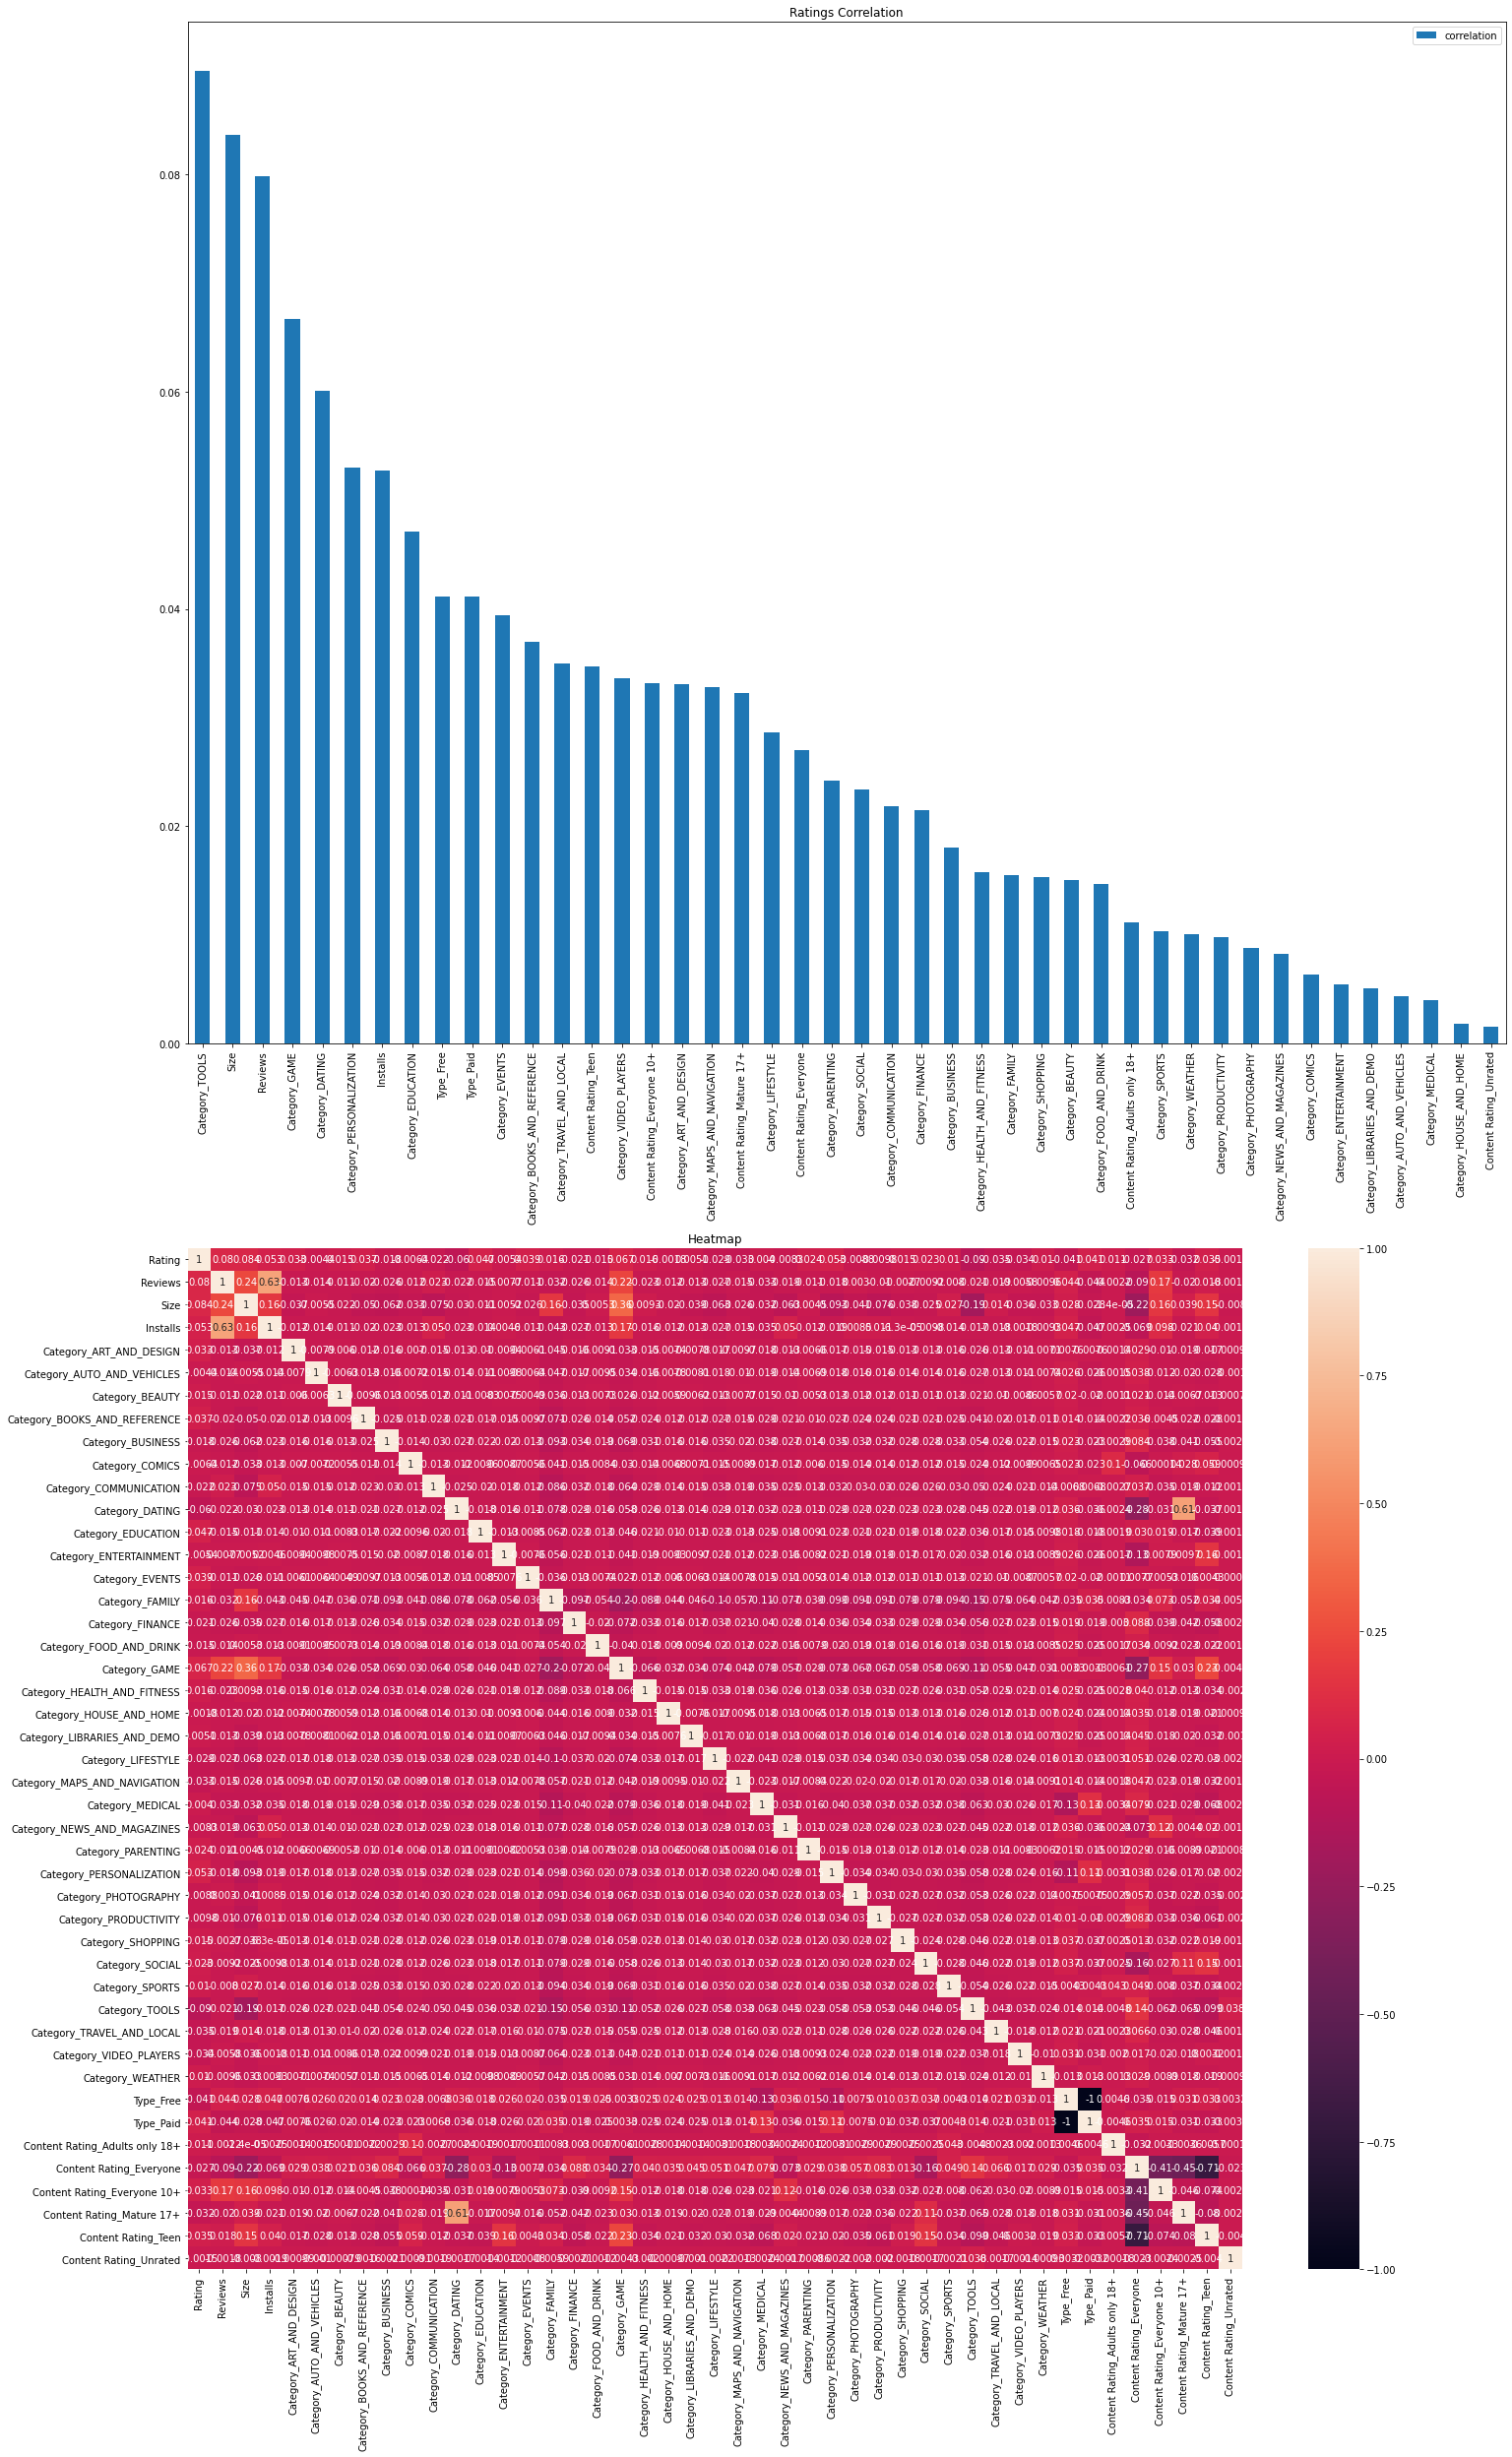

In [86]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(2,1,figsize=(24,42))

correlation = pd.DataFrame({'correlation' : features.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=features.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()

In [48]:
correlation.head(20)

correlation
Category_TOOLS                   0.089536
Size                             0.083640
Reviews                          0.079819
Category_GAME                    0.066667
Category_DATING                  0.060074
Category_PERSONALIZATION         0.053027
Installs                         0.052693
Category_EDUCATION               0.047088
Type_Free                        0.041180
Type_Paid                        0.041180
Category_EVENTS                  0.039383
Category_BOOKS_AND_REFERENCE     0.037004
Category_TRAVEL_AND_LOCAL        0.034936
Content Rating_Teen              0.034721
Category_VIDEO_PLAYERS           0.033575
Content Rating_Everyone 10+      0.033132
Category_ART_AND_DESIGN          0.033079
Category_MAPS_AND_NAVIGATION     0.032838
Content Rating_Mature 17+        0.032264
Category_LIFESTYLE               0.028621

<h4>Review Tiers (4) - as determined by cluster division 

In [49]:
review_conditions = [
(features_reset.Reviews <= 2045554) & (features_reset.Reviews >= 1),
(features_reset.Reviews <= 6800000) & (features_reset.Reviews >= 2119218),
(features_reset.Reviews <= 14300000) & (features_reset.Reviews >= 7500000),
(features_reset.Reviews <= 45000000) & (features_reset.Reviews >= 17000000),
]
review_values = ["1-2.5M","3M-6.5M","7.5M-14M","17M-45M"]
features_reset['Review Group'] = np.select(review_conditions, review_values)

print((features_reset.label_1).value_counts())

<h4>Size Tiers (5) - as determined by cluster division 

In [50]:
size_conditions = [
(features_reset.Size <= 12000000) & (features_reset.Size >= 8500),
(features_reset.Size <= 28000000) & (features_reset.Size >= 13000000),
(features_reset.Size <= 48000000) & (features_reset.Size >= 28000000),
(features_reset.Size <= 73000000) & (features_reset.Size >= 49000000),
(features_reset.Size >= 74000000),
]
size_values = ["8.5K-12M","13M-28M","29M-48M","49M-73M","74M+"]
features_reset['Size Group'] = np.select(size_conditions, size_values)

Export DataFrame with Labeled Size, Review Tiers as csv 

In [51]:
features_reset.to_csv('Resources/Features_review_size_categorical')

<h4>One-hot Encoded Review, Size Tiers DataFrame

In [52]:
features_reset = pd.get_dummies(features_reset, columns=['Review Group'])
features_reset = pd.get_dummies(features_reset, columns=['Size Group'])

features_dropped = features_reset.drop('Reviews', axis=1)
features_dropped = features_reset.drop('Size', axis=1)

In [53]:
features_dropped.head()

Rating  Reviews  Installs  Category_ART_AND_DESIGN  \
0     4.1      159     10000                        1   
1     3.9      967    500000                        1   
2     4.7    87510   5000000                        1   
3     4.5   215644  50000000                        1   
4     4.3      967    100000                        1   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                           0                0                             0   
1                           0                0                             0   
2                           0                0                             0   
3                           0                0                             0   
4                           0                0                             0   

   Category_BUSINESS  Category_COMICS  Category_COMMUNICATION  ...  \
0                  0                0                       0  ...   
1                  0                0                       0  ...   
2                  0                0                       0  ...   
3                  0                0                       0  ...   
4                  0                0                       0  ...   

                                                 App  Review Group_1-2.5M  \
0     Photo Editor & Candy Camera & Grid & ScrapBook                    1   
1                                Coloring book moana                    1   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...                    1   
3                              Sketch - Draw & Paint                    1   
4              Pixel Draw - Number Art Coloring Book                    1   

   Review Group_17M-45M  Review Group_3M-6.5M  Review Group_7.5M-14M  \
0                     0                     0                      0   
1                     0                     0                      0   
2                     0                     0                      0   
3                     0                     0                      0   
4                     0                     0                      0   

   Size Group_13M-28M  Size Group_29M-48M  Size Group_49M-73M  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   0                   0                   0   
3                   1                   0                   0   
4                   0                   0                   0   

   Size Group_74M+  Size Group_8.5K-12M  
0                0                    0  
1                0                    0  
2                0                    1  
3                0                    0  
4                0                    1  

[5 rows x 54 columns]

<h4>App Correlation to Rating with Size Tiers(5), Review Tiers(4)

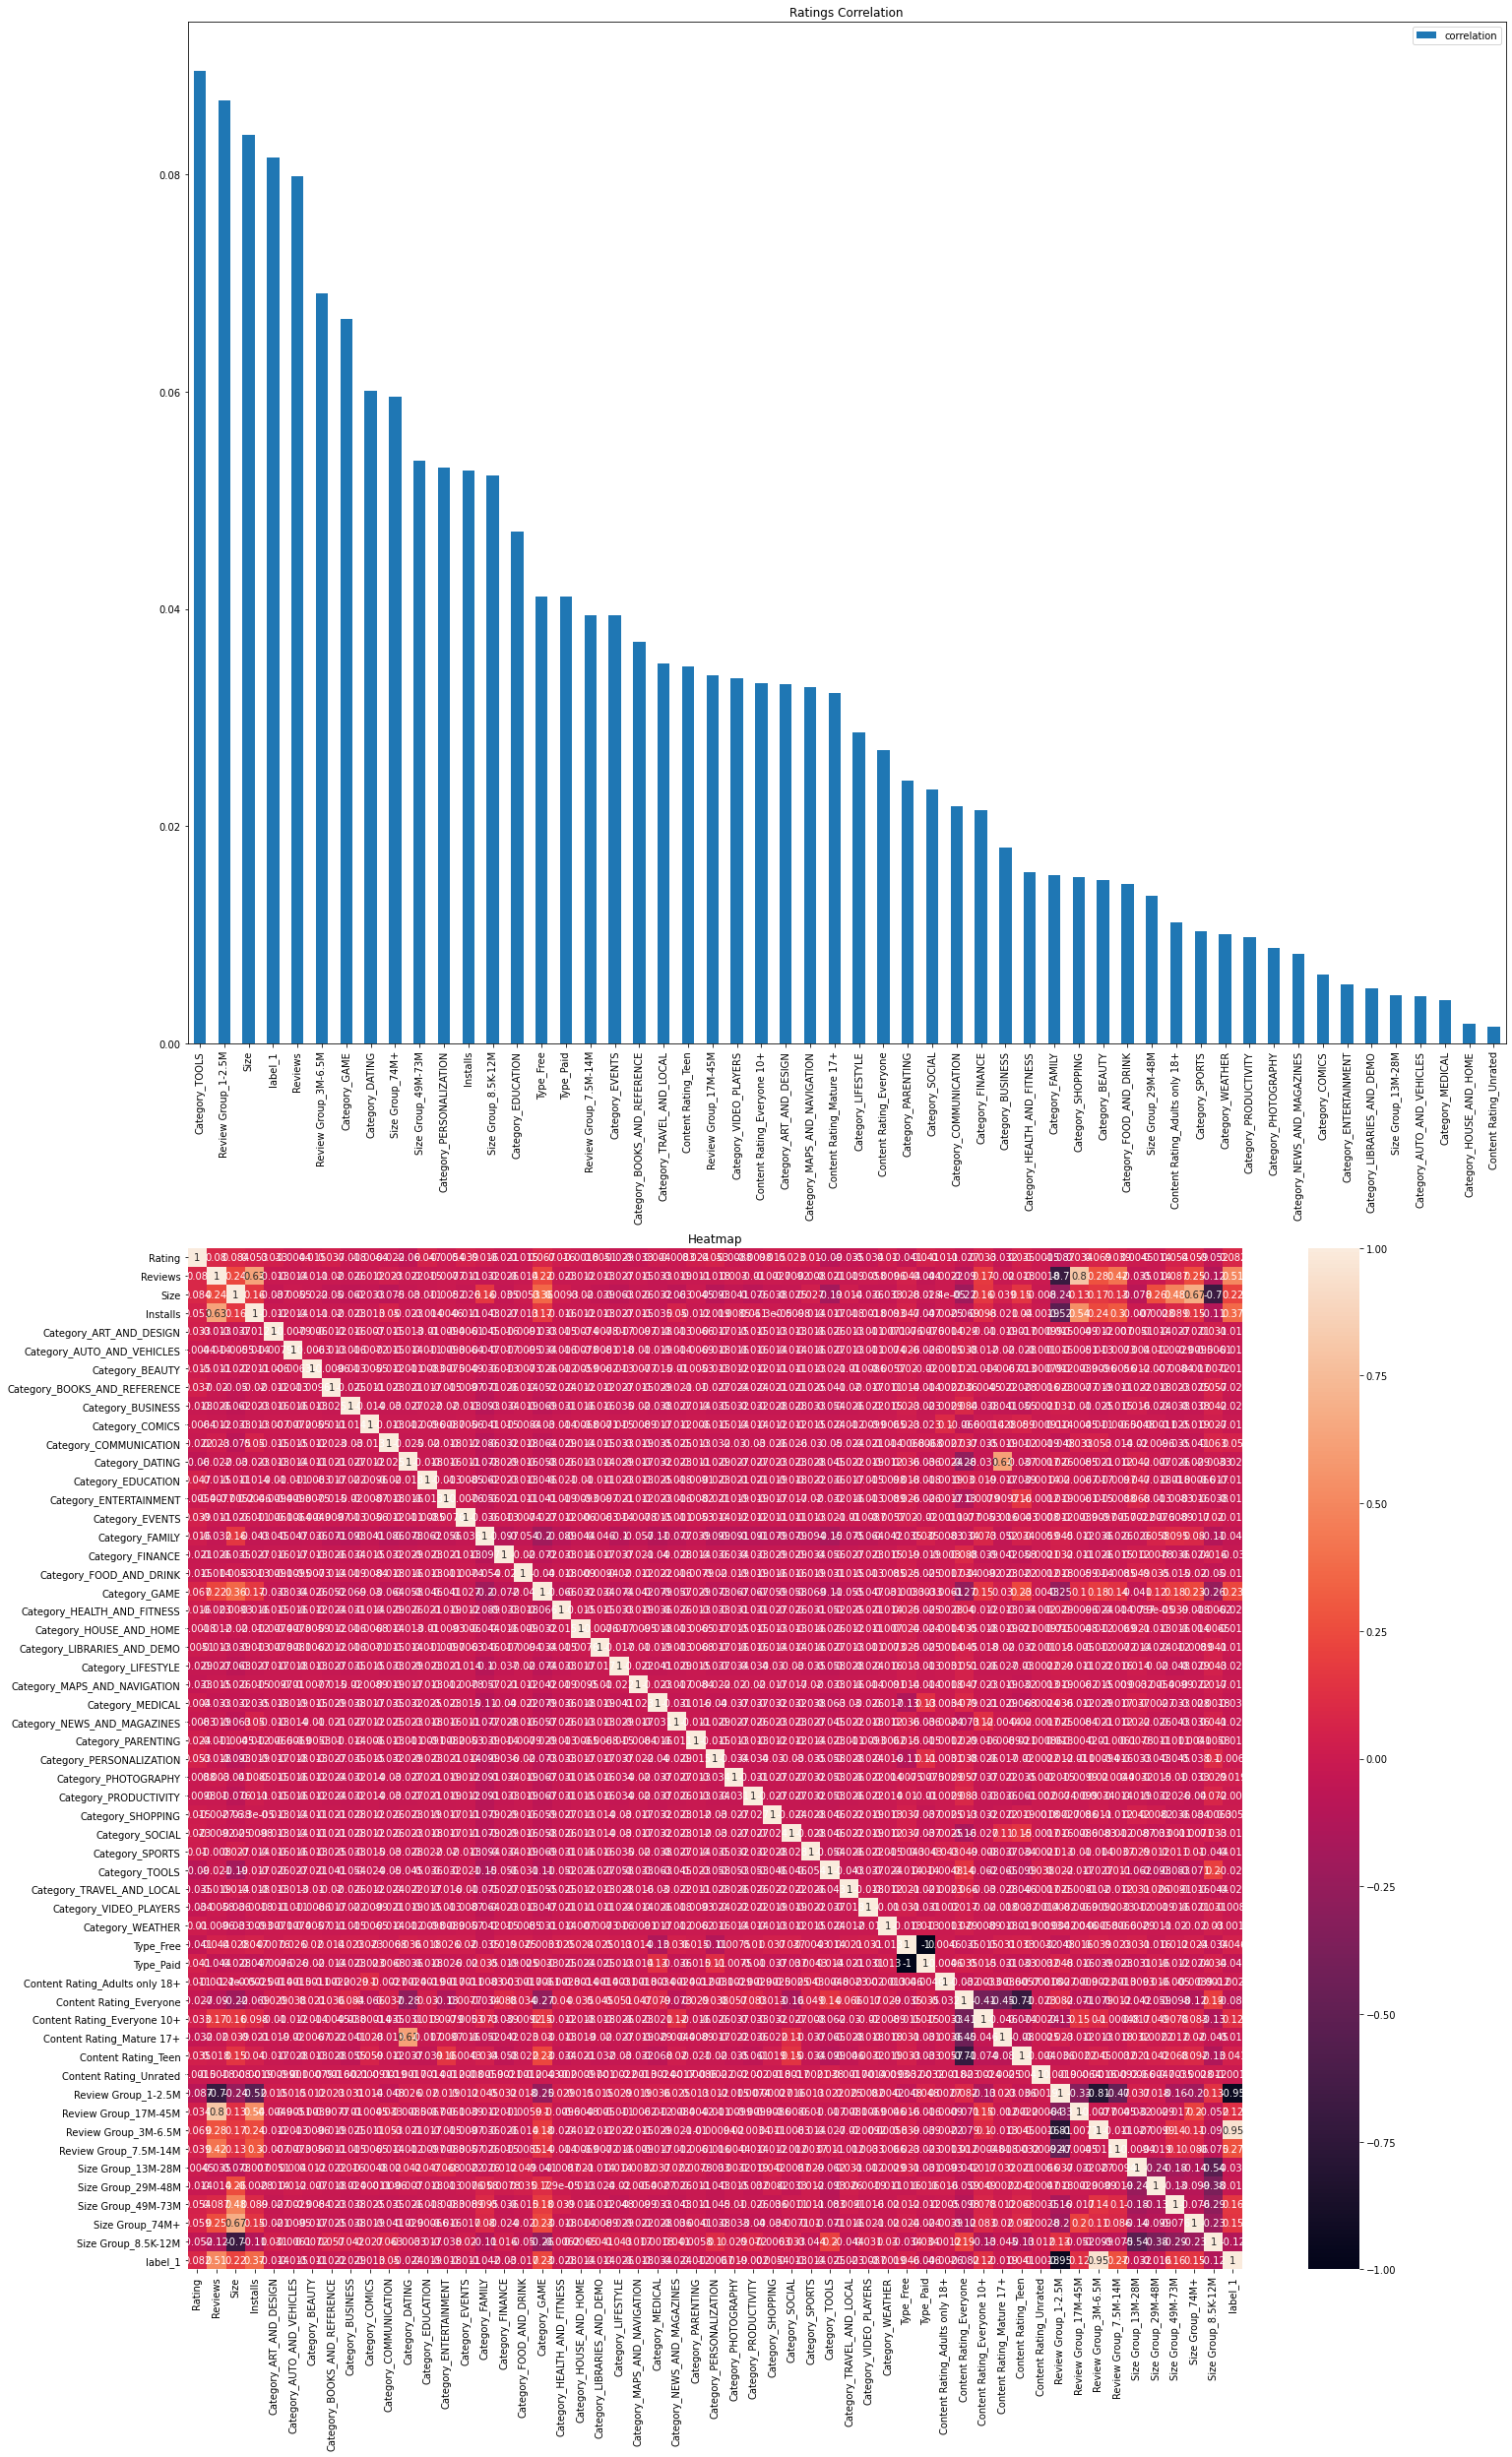

In [87]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(2,1,figsize=(24,42))

correlation = pd.DataFrame({'correlation' : features_reset.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=features_reset.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()

In [55]:
correlation.head(20)

correlation
Category_TOOLS                   0.089536
Review Group_1-2.5M              0.086825
Size                             0.083640
Reviews                          0.079819
Review Group_3M-6.5M             0.068994
Category_GAME                    0.066667
Category_DATING                  0.060074
Size Group_74M+                  0.059488
Size Group_49M-73M               0.053678
Category_PERSONALIZATION         0.053027
Installs                         0.052693
Size Group_8.5K-12M              0.052281
Category_EDUCATION               0.047088
Type_Free                        0.041180
Type_Paid                        0.041180
Review Group_7.5M-14M            0.039438
Category_EVENTS                  0.039383
Category_BOOKS_AND_REFERENCE     0.037004
Category_TRAVEL_AND_LOCAL        0.034936
Content Rating_Teen              0.034721

<h4>App Correlation to Rating with Install Tiers (19)

In [56]:
features_installs = features_reset
features_installs = pd.get_dummies(features_reset, columns=['Installs'])

In [57]:
features_installs.head()

Rating  Reviews      Size  Category_ART_AND_DESIGN  \
0     4.1      159  19000000                        1   
1     3.9      967  14000000                        1   
2     4.7    87510   8700000                        1   
3     4.5   215644  25000000                        1   
4     4.3      967   2800000                        1   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                           0                0                             0   
1                           0                0                             0   
2                           0                0                             0   
3                           0                0                             0   
4                           0                0                             0   

   Category_BUSINESS  Category_COMICS  Category_COMMUNICATION  ...  \
0                  0                0                       0  ...   
1                  0                0                       0  ...   
2                  0                0                       0  ...   
3                  0                0                       0  ...   
4                  0                0                       0  ...   

   Installs_50000  Installs_100000  Installs_500000  Installs_1000000  \
0               0                0                0                 0   
1               0                0                1                 0   
2               0                0                0                 0   
3               0                0                0                 0   
4               0                1                0                 0   

   Installs_5000000  Installs_10000000  Installs_50000000  Installs_100000000  \
0                 0                  0                  0                   0   
1                 0                  0                  0                   0   
2                 1                  0                  0                   0   
3                 0                  0                  1                   0   
4                 0                  0                  0                   0   

   Installs_500000000  Installs_1000000000  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                   0                    0  
4                   0                    0  

[5 rows x 73 columns]

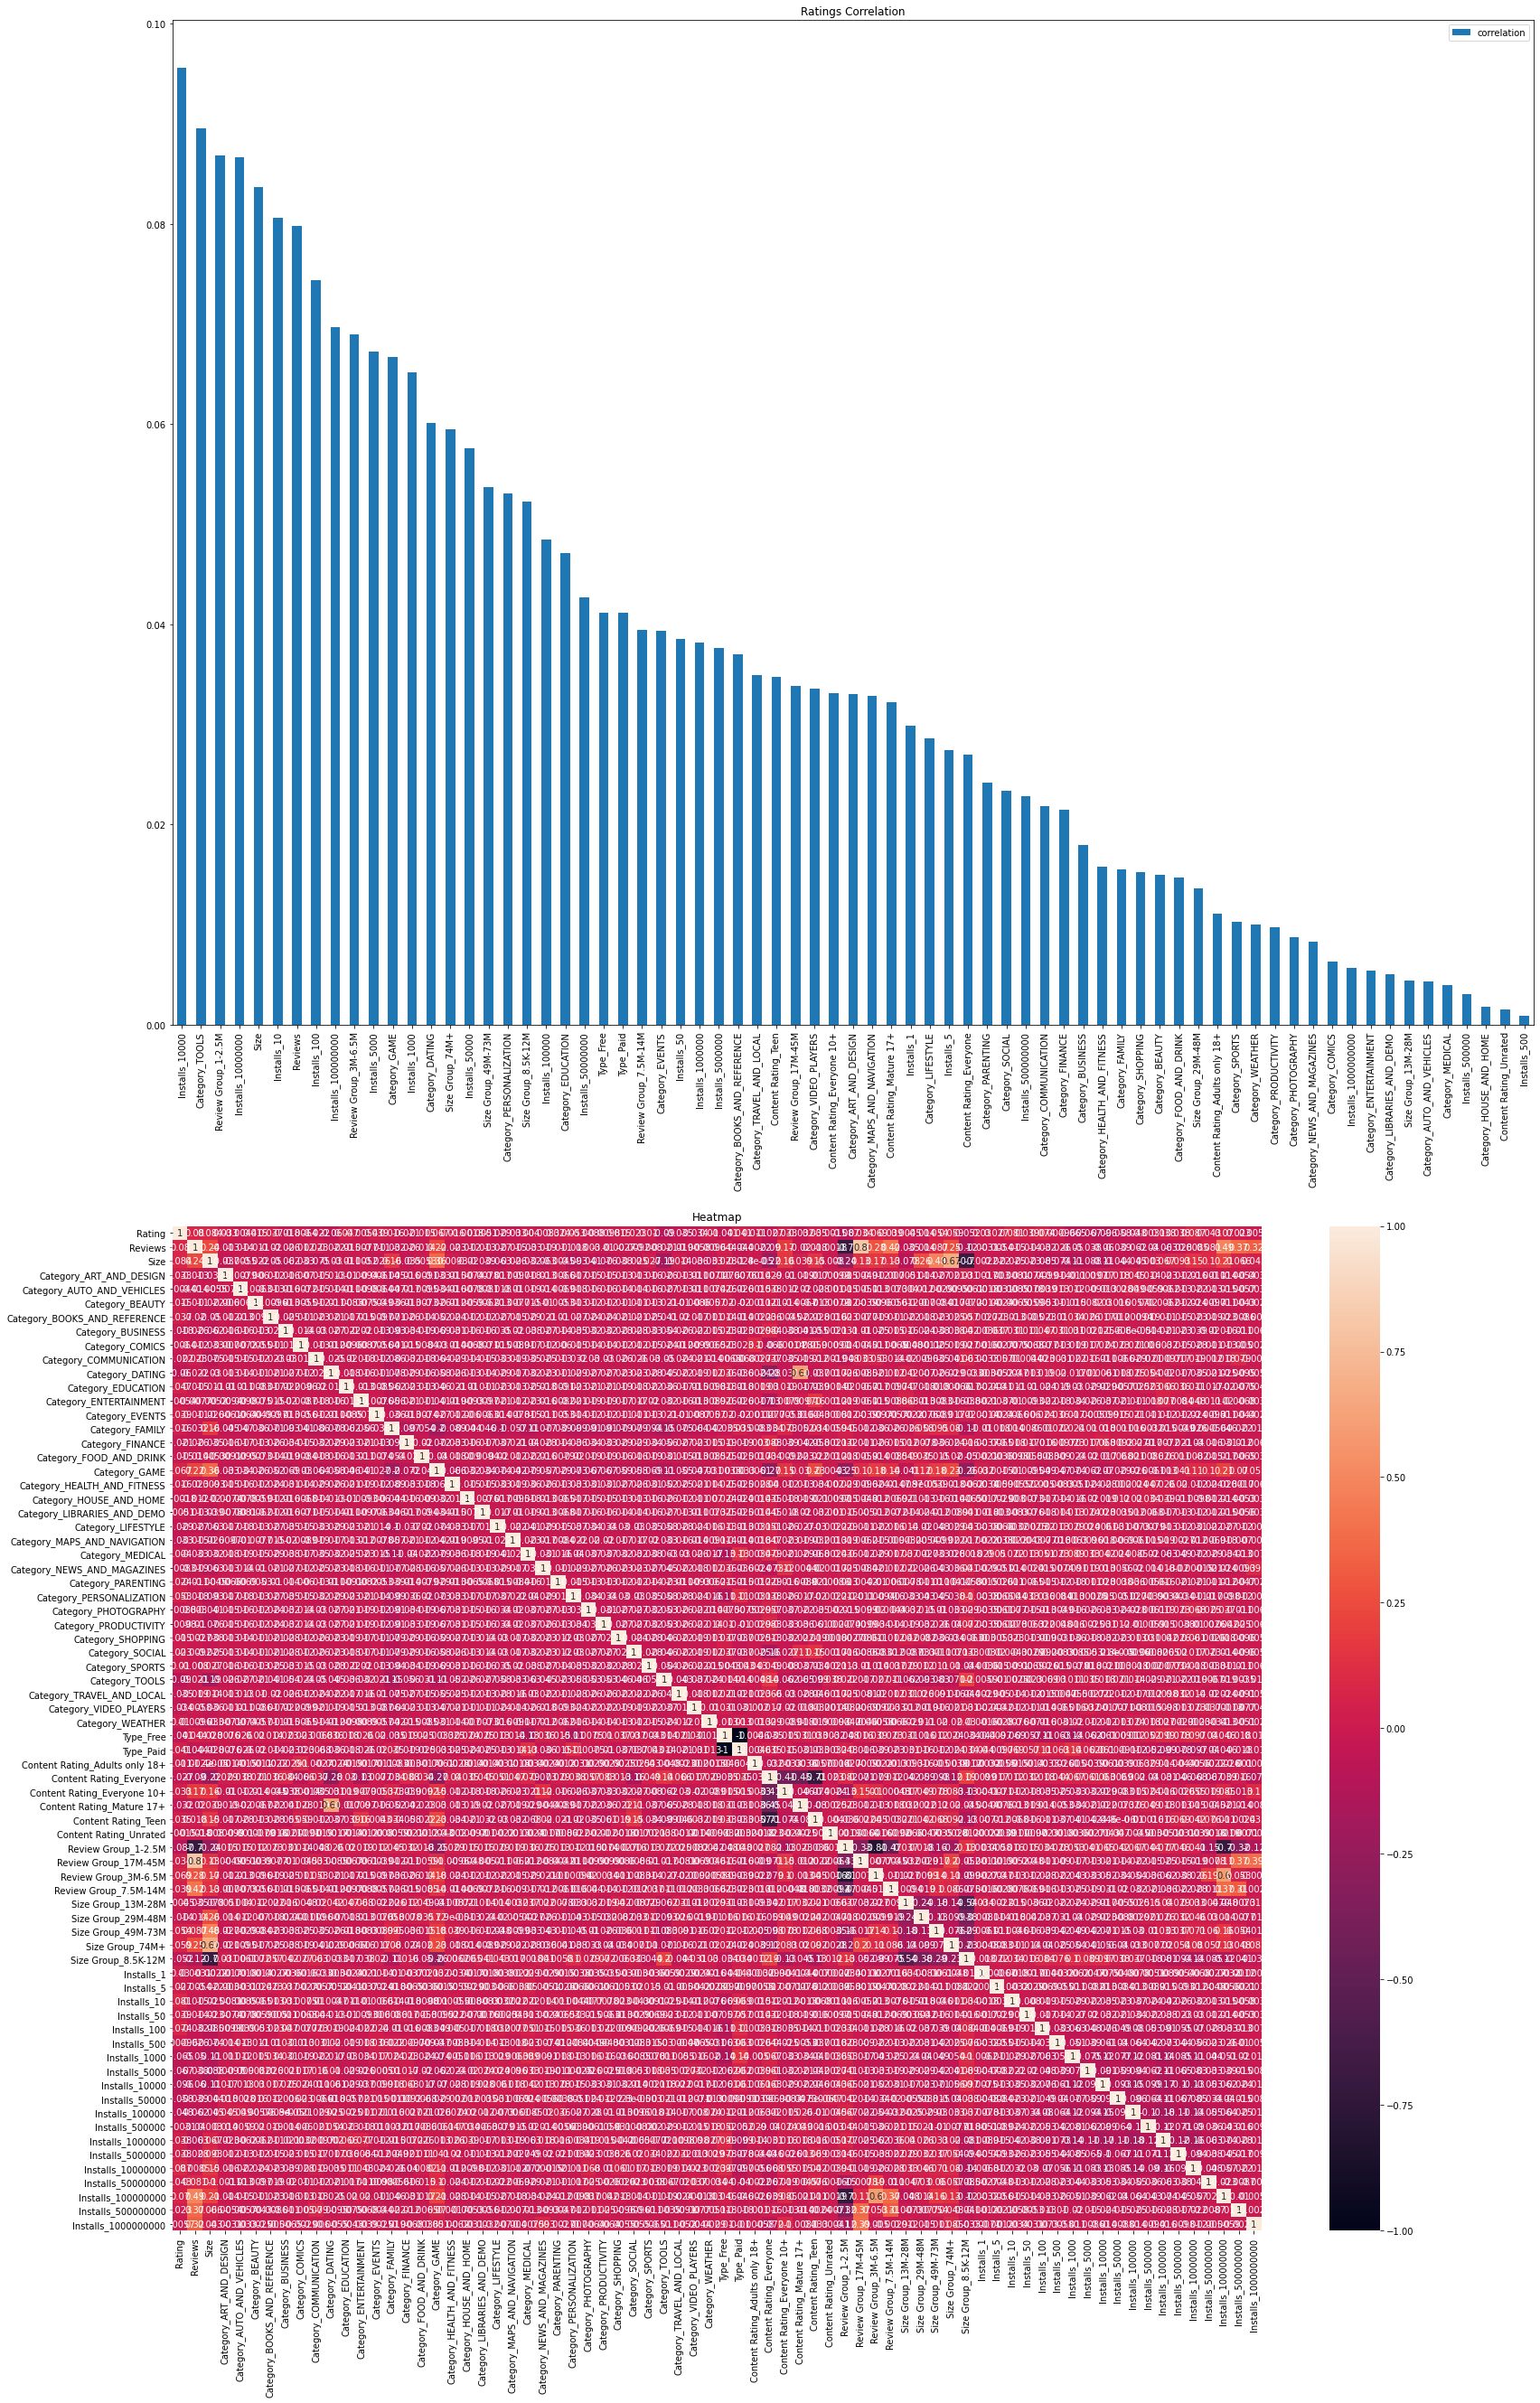

In [88]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(2,1,figsize=(27,45))

correlation = pd.DataFrame({'correlation' : features_installs.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=features_installs.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()

In [59]:
correlation.head(20)

correlation
Installs_10000               0.095554
Category_TOOLS               0.089536
Review Group_1-2.5M          0.086825
Installs_10000000            0.086596
Size                         0.083640
Installs_10                  0.080622
Reviews                      0.079819
Installs_100                 0.074331
Installs_100000000           0.069647
Review Group_3M-6.5M         0.068994
Installs_5000                0.067258
Category_GAME                0.066667
Installs_1000                0.065176
Category_DATING              0.060074
Size Group_74M+              0.059488
Installs_50000               0.057622
Size Group_49M-73M           0.053678
Category_PERSONALIZATION     0.053027
Size Group_8.5K-12M          0.052281
Installs_100000              0.048445

In [60]:
#features_reset= features_reset.drop('App', axis=1)

<h3>Methods used to determine Tier Segmentation 

<h4>K-means Clustering for Review, Size Tier Segmentation to determine correlation in accordance with Rating

Review Tier Segmenting (as example as used on Size tier Segmenting)

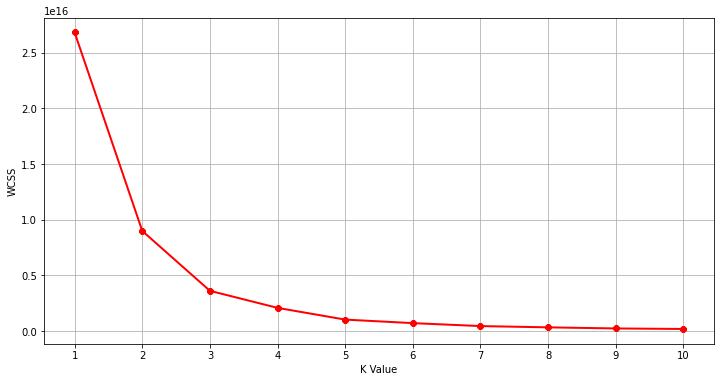

In [61]:
from sklearn.cluster import KMeans
X2=features_reset[["Reviews"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [62]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(X2) #fit and assign
features_reset["label_1"] = clusters #labels to column

In [63]:
revdf0 = features_reset[features_reset.label_1 ==0]
revdf0

reviews0_cnt= revdf0["Reviews"].value_counts()
reviews0_min= revdf0["Reviews"].min()
reviews0_max= revdf0["Reviews"].max()
print(reviews0_min)
print(reviews0_max)
print(reviews0_cnt.sum())

1
2045554
7505


In [64]:
revdf1 = features_reset[features_reset.label_1 ==1]
revdf1

reviews1_cnt= revdf1["Reviews"].value_counts()
reviews1_min= revdf1["Reviews"].min()
reviews1_max= revdf1["Reviews"].max()
print(reviews1_min)
print(reviews1_max)
print(reviews1_cnt.sum())

17712922
27725352
20


In [65]:
revdf4 = features_reset[features_reset.label_1 ==4]
revdf4

reviews4_cnt= revdf4["Reviews"].value_counts()
reviews4_min= revdf4["Reviews"].min()
reviews4_max= revdf4["Reviews"].max()
print(reviews4_min)
print(reviews4_max)
print(reviews4_cnt.sum())

2119218
6702776
144


In [66]:
revdf2 = features_reset[features_reset.label_1 ==2]
revdf2

reviews2_cnt= revdf2["Reviews"].value_counts()
reviews2_min= revdf2["Reviews"].min()
reviews2_max= revdf2["Reviews"].max()
print(reviews2_min)
print(reviews2_max)
print(reviews2_cnt.sum())

7590099
14201891
50


In [67]:
revdf3 = features_reset[features_reset.label_1 ==3]
revdf3

reviews3_cnt= revdf3["Reviews"].value_counts()
reviews3_min= revdf3["Reviews"].min()
reviews3_max= revdf3["Reviews"].max()
print(reviews3_min)
print(reviews3_max)
print(reviews3_cnt.sum())

44881447
44893888
4


actual review tier cell divisions<br>
7505 = 1-2,045,554 <br>
144 = 3,452,530-6,702,776<br>
50 = 7,590,099-14,201,891<br>
24 = 17,712,922-44,893,888<br>

<b>Normalization

Scaling Continuous Feature Values of skewed distribution and determinately incompatible value thresholds <br>

In [74]:
features_reset

Rating  Reviews      Size  Installs  Category_ART_AND_DESIGN  \
0        4.1      159  19000000     10000                        1   
1        3.9      967  14000000    500000                        1   
2        4.7    87510   8700000   5000000                        1   
3        4.5   215644  25000000  50000000                        1   
4        4.3      967   2800000    100000                        1   
...      ...      ...       ...       ...                      ...   
7718     4.8       44    619000      1000                        0   
7719     4.0        7   2600000       500                        0   
7720     4.5       38  53000000      5000                        0   
7721     5.0        4   3600000       100                        0   
7722     4.5   398307  19000000  10000000                        0   

      Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
0                              0                0   
1                              0                0   
2                              0                0   
3                              0                0   
4                              0                0   
...                          ...              ...   
7718                           0                0   
7719                           0                0   
7720                           0                0   
7721                           0                0   
7722                           0                0   

      Category_BOOKS_AND_REFERENCE  Category_BUSINESS  Category_COMICS  ...  \
0                                0                  0                0  ...   
1                                0                  0                0  ...   
2                                0                  0                0  ...   
3                                0                  0                0  ...   
4                                0                  0                0  ...   
...                            ...                ...              ...  ...   
7718                             1                  0                0  ...   
7719                             0                  0                0  ...   
7720                             0                  0                0  ...   
7721                             0                  0                0  ...   
7722                             0                  0                0  ...   

      Review Group_1-2.5M  Review Group_17M-45M  Review Group_3M-6.5M  \
0                       1                     0                     0   
1                       1                     0                     0   
2                       1                     0                     0   
3                       1                     0                     0   
4                       1                     0                     0   
...                   ...                   ...                   ...   
7718                    1                     0                     0   
7719                    1                     0                     0   
7720                    1                     0                     0   
7721                    1                     0                     0   
7722                    1                     0                     0   

      Review Group_7.5M-14M  Size Group_13M-28M  Size Group_29M-48M  \
0                         0                   1                   0   
1                         0                   1                   0   
2                         0                   0                   0   
3                         0                   1                   0   
4                         0                   0                   0   
...                     ...                 ...                 ...   
7718                      0                   0                   0   
7719                      0                   0                   0   
7720                      0                   0                

In [77]:
X2 = features_reset.iloc[:,1:4]

In [80]:
from sklearn.preprocessing import MinMaxScaler #normalization 0:1
mms = MinMaxScaler()
mms.fit(X2)
data_transformed = mms.transform(X2)
dataset = pd.DataFrame(data_transformed)
print(dataset.describe())
dataset.head()
#['Reviews','Size','Installs']

                 0            1            2
count  7723.000000  7723.000000  7723.000000
mean      0.006569     0.229639     0.008424
std       0.041519     0.234516     0.050157
min       0.000000     0.000000     0.000000
25%       0.000002     0.052919     0.000010
50%       0.000052     0.139927     0.000100
75%       0.000870     0.329943     0.001000
max       1.000000     1.000000     1.000000


0         1        2
0  0.000004  0.189931  0.00001
1  0.000022  0.139927  0.00050
2  0.001949  0.086922  0.00500
3  0.004803  0.249936  0.05000
4  0.000022  0.027917  0.00010

Normalization used to scale features 'Reviews', 'Size', 'Installs' on a 0 to 1 scale. Best used when feature values do not follow a gaussian distribution. Applied only to continuous variables. <br>
In this case it is not applied to target variable 'Rating'.<br><b>
MinMaxScaler class of sk.learn.preprocessing is used for Normalization.

<b>Standardized Scaling

In [79]:
from sklearn.preprocessing import StandardScaler #Standardization - mean:0, STD:1 to normalize distribution 
trans = StandardScaler()
data_standard = trans.fit_transform(X2)
dataset_standard = pd.DataFrame(data_standard)
print(dataset_standard.describe())
dataset_standard.head()

                  0             1             2
count  7.723000e+03  7.723000e+03  7.723000e+03
mean  -1.072433e-16 -6.464357e-16  3.987372e-15
std    1.000065e+00  1.000065e+00  1.000065e+00
min   -1.582226e-01 -9.792668e-01 -1.679635e-01
25%   -1.581655e-01 -7.535983e-01 -1.677641e-01
50%   -1.569719e-01 -3.825663e-01 -1.659697e-01
75%   -1.372699e-01  4.277336e-01 -1.480250e-01
max    2.392890e+01  3.285107e+00  1.977056e+01


0         1         2
0 -0.158138 -0.169329 -0.167764
1 -0.157704 -0.382566 -0.157994
2 -0.111271 -0.608597 -0.068271
3 -0.042523  0.086555  0.828963
4 -0.157704 -0.860217 -0.165970

Standardization used to scale features 'Reviews, 'Size', 'Installs' by centering the features at a mean of 0 with a (unit) standard deviation of 1 so that the feature columns have the same parameters as standard normal distribution. Unlike normalized distribution it maintains useful outlier information while remaining less sensitive to them. It does not have a bounding range. <br><b>
StandardScaler class of sk.learn.preprocessing is used for Standardization.

In [71]:
'''success option
success = [(app_df_new['Rating'] >=4.2),
          (app_df_new['Rating'] <4.2)]
values = ['Success', 'Not Success']
app_df_new['Success'] = np.select(success, values)
app_df_new.head()
'''

"success option\nsuccess = [(app_df_new['Rating'] >=4.2),\n          (app_df_new['Rating'] <4.2)]\nvalues = ['Success', 'Not Success']\napp_df_new['Success'] = np.select(success, values)\napp_df_new.head()\n"

In [72]:
X = features_reset.iloc[:,1:]
y = features_reset.iloc[:,0]

In [73]:
ratings = features_reset.groupby('Rating').sum()
ratings

Reviews         Size     Installs  Category_ART_AND_DESIGN  \
Rating                                                                 
1.0            28    228800000         5170                      0.0   
1.2            44     27000000         1000                      0.0   
1.4            98     20199999         7000                      0.0   
1.5            61     54000000         1105                      0.0   
1.6           691     64600000       152000                      0.0   
1.7          2360     80300000        81700                      0.0   
1.8          3418     49087000       519500                      0.0   
1.9          3531    192200000       339000                      0.0   
2.0          2974    191400000      5040050                      0.0   
2.1          3073    164200000       182000                      0.0   
2.2          1979    217400000      2130600                      0.0   
2.3          2361    344600000       264100                      0.0   
2.4         14829    275808999      1284100                      0.0   
2.5         19399    378861998      2567100                      0.0   
2.6          3437    266836000       442600                      0.0   
2.7         19329    391070000      2849800                      0.0   
2.8        124890    692171998      3509150                      0.0   
2.9         57897    672684999      7180600                      0.0   
3.0         97939   1215716000     19221770                      0.0   
3.1        292316   1124628000     88953500                      0.0   
3.2        224431    791475999     23459400                      0.0   
3.3       1159575   1495581999     78851800                      0.0   
3.4        702014   1979675997     58094950                      1.0   
3.5       1486271   2988038999    129730060                      0.0   
3.6       1387583   3504002000    131511650                      0.0   
3.7       6225686   3757463997    473500460                      0.0   
3.8       4321872   5823096996    431450500                      3.0   
3.9       9579046   6972069997   4560020300                      2.0   
4.0      20137632  10212716996   1102215910                      3.0   
4.1      49897283  12968370998   1953298600                      6.0   
4.2      90921505  17007781988   4823699160                      7.0   
4.3     266766787  21569005997  14011273810                      4.0   
4.4     506938846  23136464994  13356838700                      6.0   
4.5     752256652  23113099991  16615819960                      4.0   
4.6     505959863  16716667498   5923417700                      3.0   
4.7      39780356   8856603996    915861510                     13.0   
4.8      17710786   4418162999    301349990                      5.0   
4.9       1390241   1630434000     33882600                      0.0   
5.0          2253   3808551998        87413                      1.0   

        Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
Rating                                                
1.0                            0.0              0.0   
1.2                            0.0              0.0   
1.4                            0.0              0.0   
1.5                            0.0              0.0   
1.6                            0.0              0.0   
1.7                            0.0              0.0   
1.8                            0.0              0.0   
1.9                            0.0              0.0   
2.0                            0.0              0.0   
2.1                            1.0              0.0   
2.2                            0.0              0.0   
2.3                            0.0              0.0   
2.4                            0.0              0.0   
2.5                            0.0              0.0   
2.6                            1.0              0.0   
2.7                            0.0              0.0   
2.8                            0.0              0.0   
2.9         